In [1]:
from spc import load_full_tors
from shapely.geometry import MultiPoint
from plotting.maps import CartopyMap
from plotting.mapareas import conus

import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%env WORKDIR=~/weatherpy-work

env: WORKDIR=~/weatherpy-work


In [2]:
df = load_full_tors()
df['dayofyear'] = df.date_time.dt.dayofyear
df.head()

,date_time,yr,mo,dy,tz,st,stf,stn,mag,inj,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,dayofyear
om,,,,,,,,,,,,,,,,,,,,,
1,1950-01-03 11:00:00,1950,1,3,3,MO,29,1,3,3,...,150,2,0,1,0,0,0,0,0,3
2,1950-01-03 11:55:00,1950,1,3,3,IL,17,2,3,3,...,130,1,1,1,135,0,0,0,0,3
3,1950-01-03 16:00:00,1950,1,3,3,OH,39,1,1,1,...,10,1,1,1,161,0,0,0,0,3
4,1950-01-13 05:25:00,1950,1,13,3,AR,5,1,3,1,...,17,1,1,1,113,0,0,0,0,13
5,1950-01-25 19:30:00,1950,1,25,3,MO,29,2,2,5,...,300,1,1,1,93,0,0,0,0,25


In [3]:
firstday = 90
lastday = 180
days = range(firstday, lastday + 1)

In [4]:
def com(data, day, pm=3):
    tors = data[(data.dayofyear >= day - 3) & (data.dayofyear <= day + 3)]
    mpt = MultiPoint(tors[['slon', 'slat']].values)
    return mpt.centroid.y, mpt.centroid.x, len(tors)

In [5]:
results = []
for dy in days:
    centroid_lat, centroid_lon, n = com(df, dy)
    results.append({'day': dy, 'lat': centroid_lat, 'lon': centroid_lon, 'ntor': n})

results = pd.DataFrame(results)

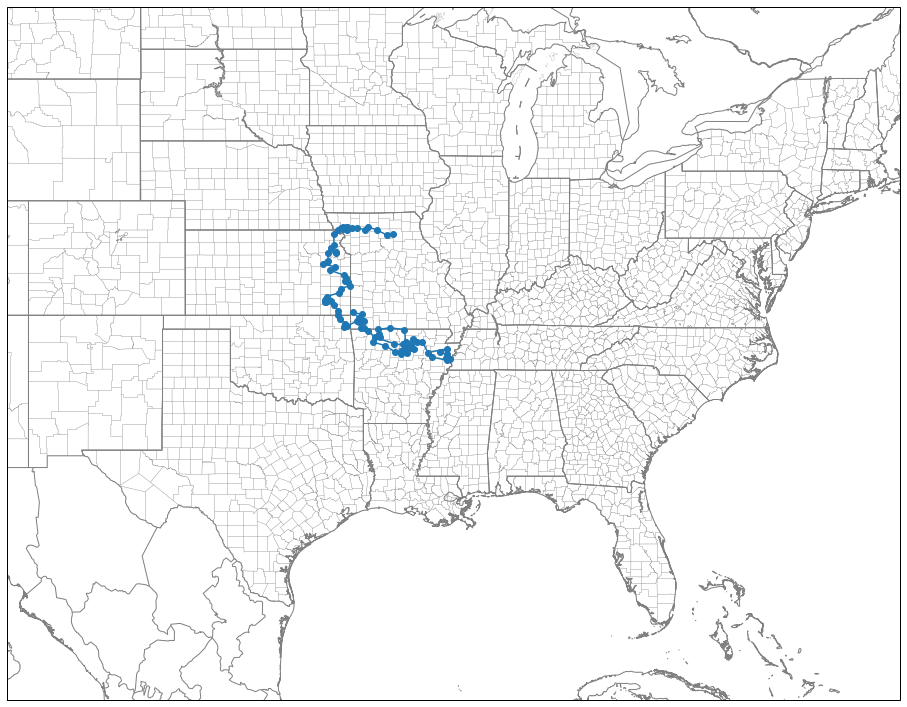

In [6]:
fig = plt.figure(figsize=(16, 16))
bgmap = CartopyMap(bbox=(-110, -70, 22, 45.5))
bgmap.draw(layers=['default', 'counties'])
bgmap.plotlatlons(results.lat, results.lon, marker='o')